<a href="https://colab.research.google.com/github/prajwalzolage2425/Image_Recognition_ML/blob/main/Image_recognition_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prajwalzolage05","key":"e87ce53c27436618f52a8a51749f69fe"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [7]:
x_train=x_train/ 255.0
x_test=x_test/ 255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


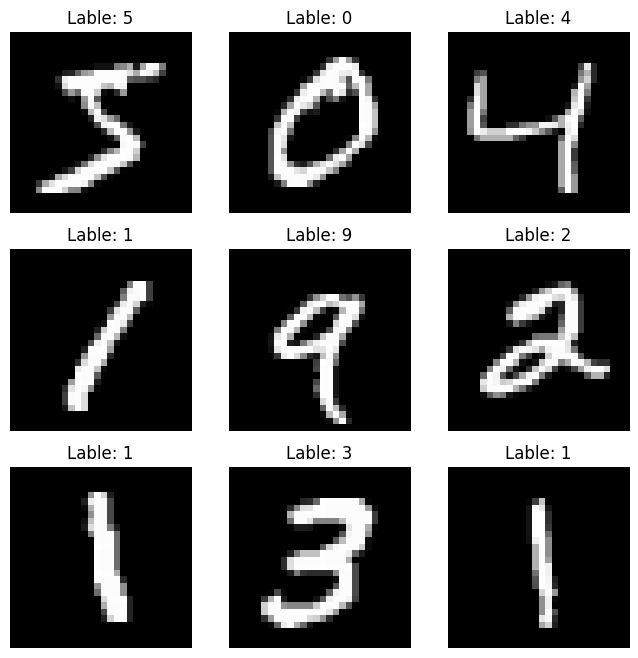

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Lable: {y_train[i]}")
  plt.axis('off')
plt.show()

In [9]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10=x_train_c10/ 255.0
x_test_c10=x_test_c10/ 255.0
print(f"CIFAR-10 Train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
CIFAR-10 Train shape: (50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8959 - loss: 0.3380 - val_accuracy: 0.9845 - val_loss: 0.0534
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9848 - loss: 0.0509 - val_accuracy: 0.9863 - val_loss: 0.0499
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9900 - loss: 0.0314 - val_accuracy: 0.9877 - val_loss: 0.0455
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9892 - val_loss: 0.0402
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9941 - loss: 0.0169 - val_accuracy: 0.9887 - val_loss: 0.0383


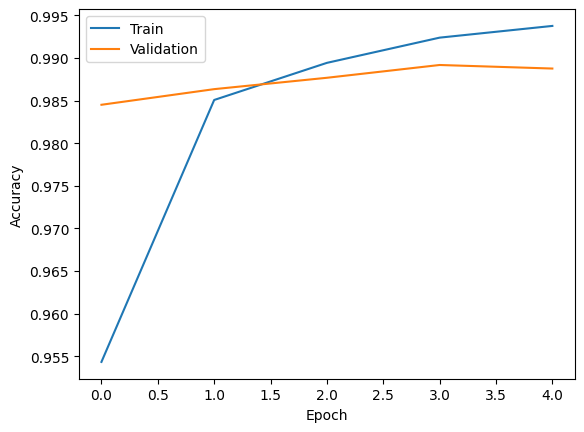

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
text_loss,text_acc=model.evaluate(x_test,y_test)
print(f"Text accuracy: {text_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9857 - loss: 0.0473
Text accuracy: 0.9892
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
from tensorflow.keras.layers import Dropout

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.3517 - loss: 1.7646 - val_accuracy: 0.5472 - val_loss: 1.2550
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5420 - loss: 1.2939 - val_accuracy: 0.5420 - val_loss: 1.3766
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5965 - loss: 1.1461 - val_accuracy: 0.6553 - val_loss: 0.9844
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6266 - loss: 1.0737 - val_accuracy: 0.6397 - val_loss: 1.0403
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6430 - loss: 1.0279 - val_accuracy: 0.6891 - val_loss: 0.9181
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6565 - loss: 0.9859 - val_accuracy: 0.6449 - val_loss: 1.0408
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6669 - loss: 0.9674 - val_accuracy: 0.6747 - val_loss: 0.9310
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6763 - loss: 0.93

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1000
           1       0.86      0.83      0.85      1000
           2       0.72      0.49      0.58      1000
           3       0.59      0.43      0.50      1000
           4       0.62      0.68      0.65      1000
           5       0.70      0.54      0.61      1000
           6       0.61      0.89      0.72      1000
           7       0.71      0.76      0.73      1000
           8       0.88      0.72      0.80      1000
           9       0.62      0.91      0.74      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



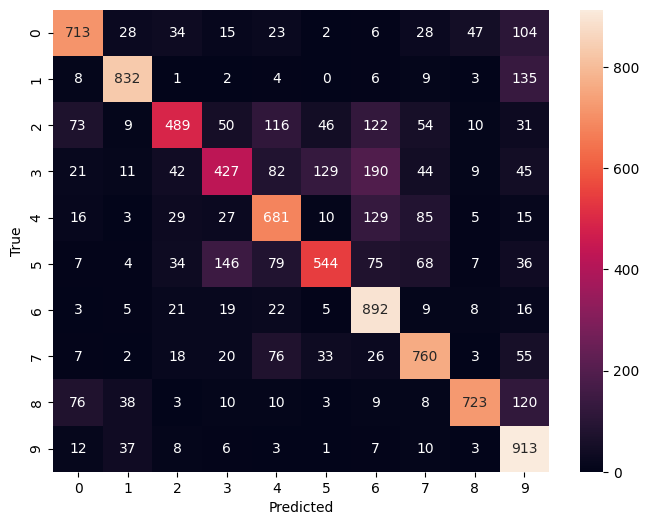

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 52% 114M/218M [00:00<00:00, 1.13GB/s]
100% 218M/218M [00:00<00:00, 763MB/s] 


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='training')

Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 200ms/step - accuracy: 0.7810 - loss: 0.5454 - val_accuracy: 0.7982 - val_loss: 0.4947
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 146ms/step - accuracy: 0.8040 - loss: 0.4911 - val_accuracy: 0.7982 - val_loss: 0.4841
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.7931 - loss: 0.4925 - val_accuracy: 0.7987 - val_loss: 0.4725
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.8012 - loss: 0.4692 - val_accuracy: 0.8027 - val_loss: 0.4446
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.8036 - loss: 0.4469 - val_accuracy: 0.8051 - val_loss: 0.4186


In [22]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 121s 279ms/step - accuracy: 0.7929 - loss: 0.4965 - val_accuracy: 0.8095 - val_loss: 0.4045
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.8069 - loss: 0.4410 - val_accuracy: 0.8114 - val_loss: 0.3963
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - accuracy: 0.8123 - loss: 0.4151 - val_accuracy: 0.8176 - val_loss: 0.3833


In [23]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step


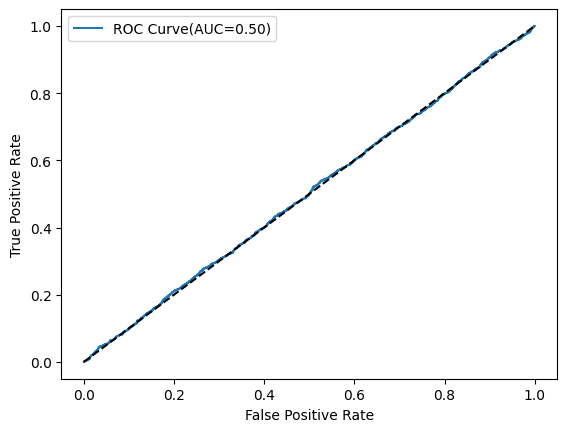

In [24]:
from sklearn.metrics import roc_curve,auc

y_pred_proba=loaded_model.predict(val_generator)

fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'ROC Curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [30]:
from google.colab import files
uploaded= files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path= 'downlod.jpg'
img=image.load_img(img_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=preprocess_input(img_array)

prediction= loaded_model.predict(img_array)
print("Predicted Class:","Dog" if prediction[0][0]>0.5 else "Cat")

Saving downlod.jpg to downlod (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Class: Dog


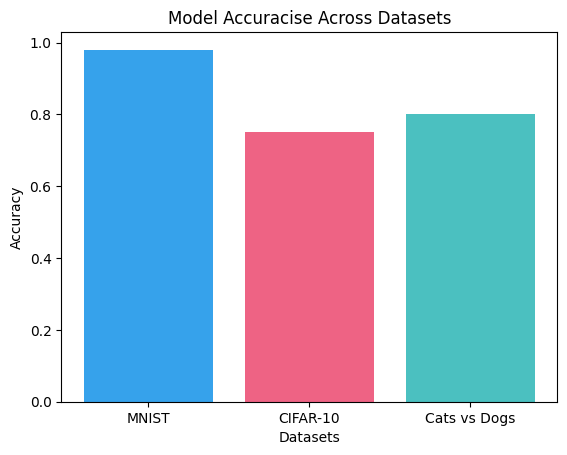

In [28]:
import matplotlib.pyplot as plt
datasets=['MNIST','CIFAR-10','Cats vs Dogs']
accuracies=[0.98,0.75,0.80]
plt.bar(datasets,accuracies,color=['#36A2EB','#EE6384','#4BC0C0'])
plt.title('Model Accuracise Across Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim()
plt.show()